In [142]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [130]:
arr = np.array([[0, 0, 0, 0, 0, 1, 1, 0, 1],
              [0, 0, 1, 0, 0, 1, 1, 0, 1],
               [0, 0, 0, 0, 0, 1, 1, 0, 1],
              [0, 0, 1, 0, 0, 1, 1, 0, 1],
               [0, 0, 0, 0, 0, 1, 1, 0, 1],
              [0, 0, 1, 0, 0, 1, 1, 0, 1]])
sparseMatrix = sp.csr_matrix(arr)
features = sparseMatrix.toarray()
print(features)

[[0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 1 1 0 1]
 [0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 1 1 0 1]
 [0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 1 1 0 1]]


In [134]:
arr = np.array([[0, 0, 0, 0, 0, 1, 0.098, 0, 1],
              [0, 0, 1, 0, 0, 0.87, 1, 0, 1],
               [0, 0, 0.12, 0, 0, 1, 1, 0, 1],
              [0, 0, 1, 0, 0, 1, 0.6, 0, 1],
               [0, 0, 0.9, 0, 0, 1, 1, 0, 1],
              [0, 0, 1, 0, 0, 1, 0.66, 0, 1]])
sparseMatrix = sp.csr_matrix(arr)
features = sparseMatrix.toarray()
print(features)

[[0.    0.    0.    0.    0.    1.    0.098 0.    1.   ]
 [0.    0.    1.    0.    0.    0.87  1.    0.    1.   ]
 [0.    0.    0.12  0.    0.    1.    1.    0.    1.   ]
 [0.    0.    1.    0.    0.    1.    0.6   0.    1.   ]
 [0.    0.    0.9   0.    0.    1.    1.    0.    1.   ]
 [0.    0.    1.    0.    0.    1.    0.66  0.    1.   ]]


In [100]:
print(sparseMatrix)

  (0, 5)	1.0
  (0, 6)	0.098
  (0, 8)	1.0
  (1, 2)	1.0
  (1, 5)	0.87
  (1, 6)	1.0
  (1, 8)	1.0
  (2, 2)	0.12
  (2, 5)	1.0
  (2, 6)	1.0
  (2, 8)	1.0
  (3, 2)	1.0
  (3, 5)	1.0
  (3, 6)	0.6
  (3, 8)	1.0
  (4, 2)	0.9
  (4, 5)	1.0
  (4, 6)	1.0
  (4, 8)	1.0
  (5, 2)	1.0
  (5, 5)	1.0
  (5, 6)	0.66
  (5, 8)	1.0


In [91]:
ratio = 0.2
pert_idx = np.random.choice(len(features), int(0.5*len(features)))

In [93]:
features[pert_idx]

array([[0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1]])

In [92]:
pert_idx

array([2, 5, 0])

In [135]:
ratio = 0.5
pert_idx = np.random.choice(len(features), int(ratio*len(features)))
perturbed = []
for row in range(len(features)):
    if row in pert_idx:
        arr = features[row]
#         flip_mask = [0]*int(0.8*len(arr)) + [1]*(len(arr)-int(0.8*len(arr)))
#         np.random.shuffle(flip_mask)
#         flip_mask = np.array(flip_mask, dtype=bool)
#         np.logical_not(arr, where=flip_mask, out=arr)    
        p_idx = np.random.choice(len(arr), int(0.2*len(arr)))
        arr[p_idx] = 1-arr[p_idx]
        perturbed.append(arr)
    else:
        arr = features[row]
        perturbed.append(arr)

In [136]:
print(perturbed)

[array([0.   , 0.   , 1.   , 0.   , 0.   , 1.   , 0.098, 0.   , 1.   ]), array([0.  , 0.  , 1.  , 0.  , 0.  , 0.87, 1.  , 1.  , 1.  ]), array([0.  , 0.  , 0.12, 0.  , 0.  , 1.  , 0.  , 0.  , 1.  ]), array([0. , 0. , 1. , 0. , 0. , 1. , 0.6, 0. , 1. ]), array([0. , 0. , 0.9, 0. , 0. , 1. , 1. , 0. , 1. ]), array([0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.66, 0.  , 1.  ])]


In [137]:
print(sp.csr_matrix(perturbed).toarray())

[[0.    0.    1.    0.    0.    1.    0.098 0.    1.   ]
 [0.    0.    1.    0.    0.    0.87  1.    1.    1.   ]
 [0.    0.    0.12  0.    0.    1.    0.    0.    1.   ]
 [0.    0.    1.    0.    0.    1.    0.6   0.    1.   ]
 [0.    0.    0.9   0.    0.    1.    1.    0.    1.   ]
 [0.    0.    1.    0.    0.    1.    0.66  0.    1.   ]]


In [114]:
arr

array([0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.66, 0.  , 1.  ])

In [117]:
flip_mask = [0]*int(0.8*len(arr)) + [1]*(len(arr)-int(0.8*len(arr)))
np.random.shuffle(flip_mask)
flip_mask = np.array(flip_mask, dtype=bool)

In [118]:
flip_mask

array([False, False, False, False,  True, False, False, False,  True])

In [120]:
1-arr[flip_mask]

array([1., 0.])

In [121]:
p_idx = np.random.choice(len(arr), int(0.2*len(arr)))

In [125]:
p_idx

array([5])

In [123]:
arr[p_idx] = 1-arr[p_idx]

In [124]:
arr

array([0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.66, 0.  , 1.  ])

In [74]:
arr2

array([0, 0, 0, 0, 0, 1, 1, 0, 1])

In [75]:
np.logical_not(arr2, where=flip_mask, out=arr2)

array([0, 0, 1, 0, 0, 1, 1, 1, 1])

In [40]:
np.random.choice([0,1], 10, 2)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [139]:
df = pd.read_csv('/home/zihe-leon/Downloads/680 project results - Sheet1 (1).csv')

In [140]:
df

,noise level,Cora,Citeseer,Pubmed
0,0%,0.827,0.706,0.789
1,20%,0.810,0.708,0.782
2,40%,0.807,0.714,0.788
3,60%,0.794,0.699,0.756
4,80%,0.784,0.674,0.758
5,100%,0.769,0.666,0.740


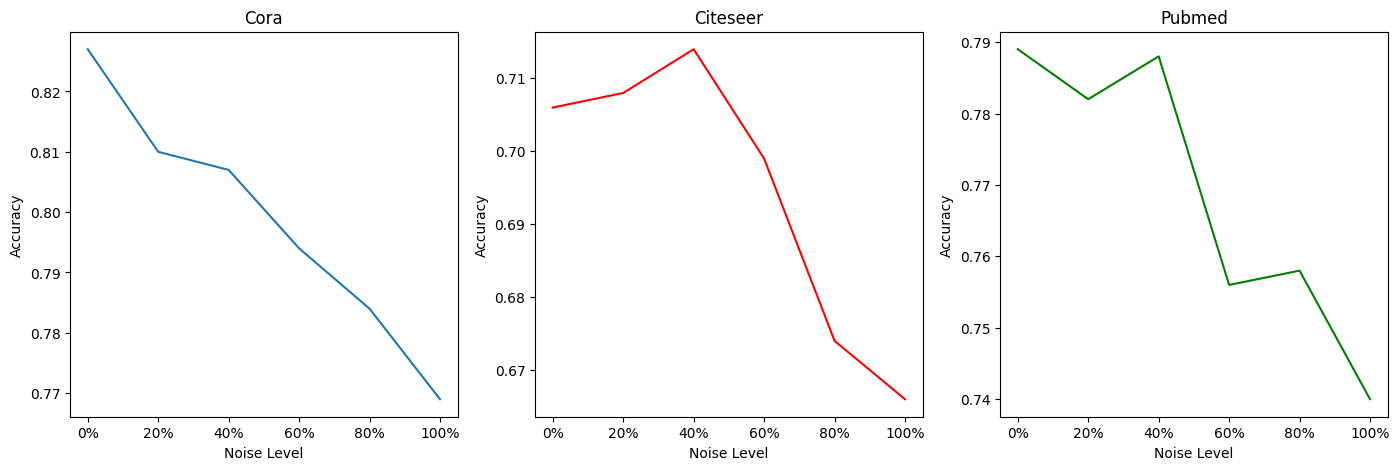

In [151]:
plt.figure(figsize = (17,5))
plt.subplot(1,3,1)
plt.title("Cora")
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.plot(df['noise level'], df['Cora'])
plt.subplot(1,3,2)
plt.title("Citeseer")
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.plot(df['noise level'], df['Citeseer'], color = 'red')
plt.subplot(1,3,3)
plt.title("Pubmed")
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.plot(df['noise level'], df['Pubmed'], color = 'green')

In [2]:
import tensorflow as tf

In [22]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]],
                 [[3, 3, 3], [4, 4, 4]],
                 [[5, 5, 5], [6, 6, 6]]])
tf.slice(t, [1, 0, 0], [2, 1, 2])  # [[[3, 3, 3]]]
# tf.slice(t, [1, 0, 0], [1, 2, 3])  # [[[3, 3, 3],
#                                    #   [4, 4, 4]]]
# tf.slice(t, [1, 0, 0], [2, 1, 3])  # [[[3, 3, 3]],
#                                    #  [[5, 5, 5]]]

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[3, 3]],

       [[5, 5]]], dtype=int32)>

In [72]:
[1]+[0, 9]

[1, 0, 9]

In [32]:
import time
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from utils import *
from models import RGCN
import random
# Set random seed
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)
random.seed(seed)

adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, label = load_data('cora')

/home/zihe-leon/Desktop/RobustGCN-master/src/utils.py:52: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))


In [44]:
train_mask[641:1706] = True

In [45]:
train_mask[train_mask==True].shape

(1205,)

In [34]:
val_mask[val_mask==True].shape

(500,)

In [35]:
test_mask[test_mask==True].shape

(1000,)

In [38]:
gpc_idx = []
for idx in range(2708):
    if not (train_mask[idx] or test_mask[idx] or val_mask[idx]):
        gpc_idx.append(idx)

In [42]:
gpc_idx[-1]

1707

## GPC

In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [48]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(X, y)
gpc.score(X, y)

gpc.predict(X[:2,:])

array([0, 0])

In [42]:
def perturb_features(features, ratio):
    features = features.toarray()
    y_train_gpc = [0]*features.shape[0]
    pert_idx = np.random.choice(len(features), int(ratio*len(features)))
    perturbed = []
    for row in range(len(features)):
        if row in pert_idx:
            y_train_gpc[row] = 1
            arr = features[row]
            # flip_mask = [0]*int(0.8*len(arr)) + [1]*(len(arr)-int(0.8*len(arr)))
            # np.random.shuffle(flip_mask)
            # flip_mask = np.array(flip_mask, dtype=bool)
            p_idx = np.random.choice(len(arr), int(0.8*len(arr)))
            arr[p_idx] = 1-arr[p_idx]
            # np.logical_not(arr, where=flip_mask, out=arr)    
            perturbed.append(arr)
        else:
            arr = features[row]
            perturbed.append(arr)
    # perturbed_features = sp.csr_matrix(perturbed)
    return perturbed, y_train_gpc

In [ ]:
def get_gpc_train_data(perturbed_features, y_train_gpc):
    # input all perturbed features, and all gpc label (whether perturbed)
    # return index, feature and labels used for gpc training
    gpc_idx = []
    gpc_feature = []
    gpc_y_train_gpc = []
    for idx in range(len(perturbed_features)):
        if train_mask[idx]:
            if np.random.random()>0.8:
                gpc_idx.append(idx)
                gpc_feature.append(perturbed_features[idx])
                gpc_y_train_gpc.append(y_train_gpc[idx])

    return gpc_idx, gpc_feature, gpc_y_train_gpc

In [11]:
import time
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from utils import *
from models import RGCN
import random
# Set random seed
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)
random.seed(seed)

# Settings
# flags = tf.app.flags
# FLAGS = flags.FLAGS
# flags.DEFINE_string('dataset', 'cora', 'Dataset string.')  # 'cora', 'citeseer', 'pubmed'
# flags.DEFINE_float('learning_rate', 0.01, 'Initial learning rate.')
# flags.DEFINE_integer('epochs', 200, 'Number of epochs to train.')
# flags.DEFINE_integer('hidden', 32, 'Number of units in hidden layer.')
# flags.DEFINE_float('dropout', 0.6, 'Dropout rate (1 - keep probability).')
# flags.DEFINE_float('para_var', 1, 'Parameter of variance-based attention')
# flags.DEFINE_float('para_kl', 5e-4, 'Parameter of kl regularization')
# flags.DEFINE_float('para_l2', 5e-4, 'Parameter for l2 loss.')
# flags.DEFINE_integer('early_stopping', 20, 'Tolerance for early stopping (# of epochs).')

# Load data
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, label = load_data('cora')


# add noise to the data
perturbed_features, y_train_gpc = perturb_features(features, 0.2)
gpc_idx, gpc_feature, gpc_y_train_gpc = get_gpc_train_data(perturbed_features, y_train_gpc)

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(gpc_feature, gpc_y_train_gpc)
gpc.score(perturbed_features, y_train_gpc)
gpc_res = gpc.predict(perturbed_features)
gpc_predict_pert_idx = [i for i, x in enumerate(gpc_res==1) if x]
# features = preprocess_features(features)

/home/zihe-leon/Desktop/RobustGCN-master/src/utils.py:52: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))


ValueError: too many values to unpack (expected 2)

In [60]:
all_index = list(range(len(y_train)))

In [64]:
gpc_res==1

array([False,  True, False, ..., False,  True, False])

In [68]:
len(gpc_predict_pert_idx)

496

In [62]:
all_index[gpc_res==1]

TypeError: only integer scalar arrays can be converted to a scalar index

In [55]:
len(gpc_res)

2708

In [ ]:
gpc_idx = np.random.choice(len(features), int(ratio*len(features)))

In [30]:
np.random.random()

0.2892089673064546

In [52]:
for i in len(train_mask):
    if train_mask[i]

array([ True,  True,  True, ..., False, False, False])

In [53]:
val_mask

array([False, False, False, ..., False, False, False])

In [54]:
test_mask

array([False, False, False, ...,  True,  True,  True])

In [47]:
len(train_mask[train_mask==True])

140

In [48]:
len(val_mask[val_mask==True])

500

In [49]:
len(test_mask[test_mask==True])

1000

In [13]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(features, y_train)
gpc.score(features, y_train)

# gpc.predict_proba(X[:2,:])

1.0

In [ ]:
pd.to_csv()

In [21]:
len(y_train)

2708

In [22]:
features.shape

(2708, 1433)

In [9]:
features.toarray()

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
arr = [0]*5

In [11]:
arr[1] = 1

SyntaxError: invalid syntax (3349921199.py, line 1)

In [8]:
arr

[0, 1, 0, 0, 0]

In [1]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
tensor = tf.range(10)
tf.print(tensor)

2023-04-08 13:38:40.018975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 13:38:40.329766: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-08 13:38:41.089091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zihe-leon/anaconda3/envs/gcn3/lib/
2023-04-08 13:38:41.089185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_p

[0 1 2 ... 7 8 9]


2023-04-08 13:38:42.089738: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-04-08 13:38:42.089774: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: zihe-leon
2023-04-08 13:38:42.089782: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: zihe-leon
2023-04-08 13:38:42.089863: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.105.1
2023-04-08 13:38:42.089883: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2023-04-08 13:38:42.089890: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.86.1 does not match DSO version 515.105.1 -- cannot find working devices in this configuration
2023-04-08 13:38:42.091520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This Tensor

In [1]:
import tensorflow as tf
import numpy as np
tensor = tf.constant(np.arange(1, 5, dtype=np.int32), shape=[2, 2])
tensor2  = tf.constant(np.arange(1, 5, dtype=np.int32), shape=[2, 2])


2023-04-08 14:39:28.855162: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 14:39:28.968971: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-08 14:39:29.451351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zihe-leon/anaconda3/envs/gcn3/lib/
2023-04-08 14:39:29.451401: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_p

In [2]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [3]:
tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [4]:
def dot(x, y, sparse=False):

    if sparse:
        res = tf.sparse_tensor_dense_matmul(x, y)
    else:
        res = tf.matmul(x, y)
    return res
type(tf.nn.relu(dot(tensor, tensor2)))

tensorflow.python.framework.ops.EagerTensor

## Variance threshold

In [39]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt

(array([1.5000e+01, 1.6800e+02, 9.7500e+02, 5.3460e+03, 1.0528e+04,
        1.8720e+03, 6.4400e+02, 1.3900e+02, 2.5000e+01, 5.0000e+00]),
 array([0.0302128 , 0.08247123, 0.13472966, 0.18698809, 0.23924652,
        0.29150495, 0.34376338, 0.3960218 , 0.44828023, 0.50053866,
        0.55279709]),
 <BarContainer object of 10 artists>)

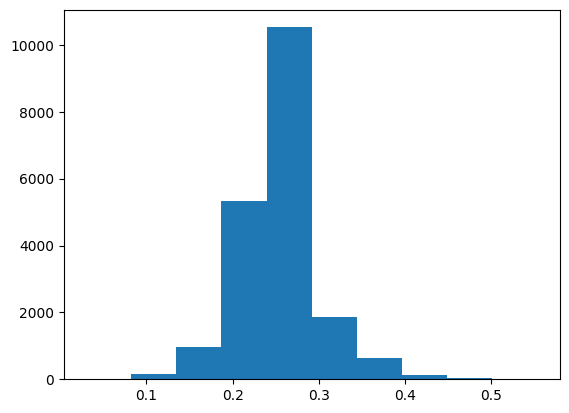

In [40]:
var0 = pd.read_csv('var0.csv')
var0['mean'] = var0.mean(axis=1)
plt.hist(var0['mean'])

In [41]:
var0.shape

(19717, 17)

In [42]:
perturbed_idx = np.load('/home/zihe-leon/Desktop/RobustGCN-master/perturbed_idx.npy')
perturbed = [False]*var0.shape[0]
for i in range(len(perturbed)):
    if i in perturbed_idx:
        perturbed[i] = True
var0['Perturbed'] = perturbed

In [43]:
# var0

In [44]:
var0[var0['Perturbed']==True]['mean'].shape

(10938,)

In [45]:
var0[var0['Perturbed']==False]['mean'].shape

(8779,)

(array([  14.,  119.,  605., 1879., 3173., 2969., 1621.,  481.,   71.,
           6.]),
 array([0.17962833, 0.19394835, 0.20826837, 0.2225884 , 0.23690842,
        0.25122844, 0.26554846, 0.27986848, 0.2941885 , 0.30850852,
        0.32282855]),
 <BarContainer object of 10 artists>)

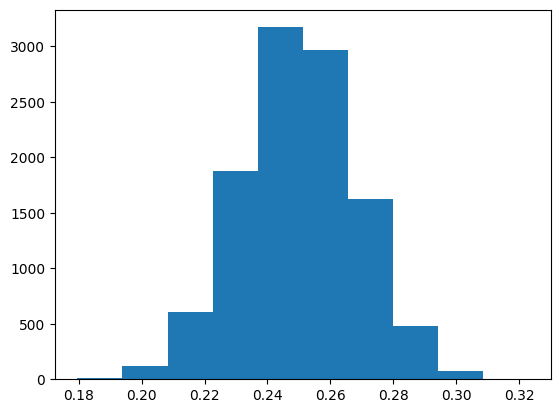

In [46]:
plt.hist(var0[var0['Perturbed']==True]['mean'])

(array([  15.,  168.,  971., 2282., 2785., 1745.,  644.,  139.,   25.,
           5.]),
 array([0.0302128 , 0.08247123, 0.13472966, 0.18698809, 0.23924652,
        0.29150495, 0.34376338, 0.3960218 , 0.44828023, 0.50053866,
        0.55279709]),
 <BarContainer object of 10 artists>)

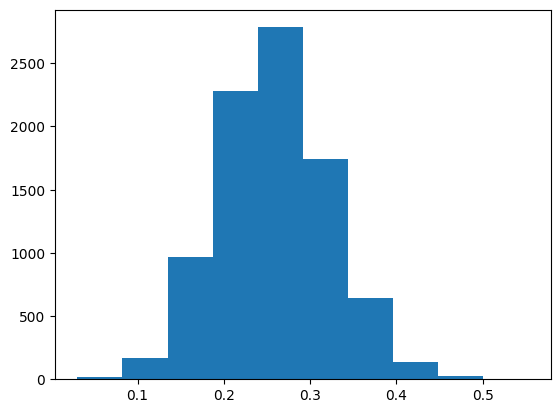

In [47]:
plt.hist(var0[var0['Perturbed']==False]['mean'])

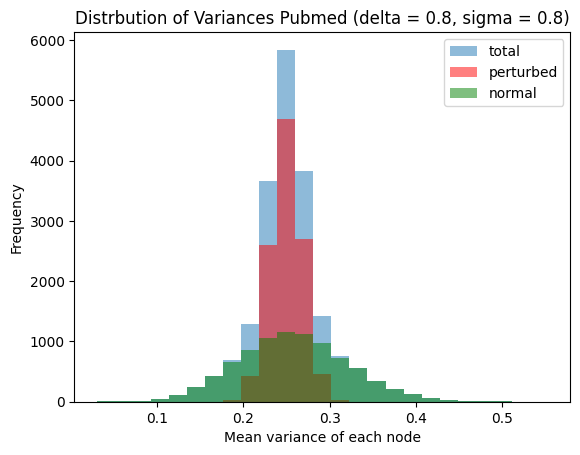

In [48]:
plt.title("Distrbution of Variances Pubmed (delta = 0.8, sigma = 0.8)")
plt.xlabel('Mean variance of each node')
plt.ylabel('Frequency')
_, bins, _ = plt.hist(var0['mean'], label='total', alpha = 0.5, bins = 25)
plt.hist(var0[var0['Perturbed']==True]['mean'], color='red', label='perturbed', alpha = 0.5, bins = bins)
plt.hist(var0[var0['Perturbed']==False]['mean'], color='green', label='normal', alpha = 0.5, bins = bins)
plt.legend(loc='upper right')

In [23]:
var0['mean'][0]

0.328183829375

In [49]:
low_var_idx = []
for i in range(var0.shape[0]):
    if var0['mean'][i]< 0.1634:
        low_var_idx.append(i)

In [50]:
high_var_idx = []
for i in range(var0.shape[0]):
    if var0['mean'][i]> 0.3437:
        high_var_idx.append(i)

In [51]:
import time
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from utils import *
from models import RGCN
import random
import scipy.sparse as sp
# Set random seed
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)
random.seed(seed)

# Load data
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, label = load_data('pubmed')


2023-05-06 21:39:47.558697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 21:39:47.668668: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-06 21:39:48.082144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zihe-leon/anaconda3/envs/gcn3/lib/
2023-05-06 21:39:48.082191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_p

In [52]:
features = features.toarray()

In [53]:
max(features.flatten())

1.2633097

In [54]:
low_var = features[low_var_idx, :]
high_var = features[high_var_idx, :]
mid_var = np.delete(features, low_var_idx+high_var_idx, 0)

In [55]:
def investigate(selected_nodes):
    var_l = []
    num_one_l = []
    max_l = []
    for row in selected_nodes:
        maximum = max(row)
        num_one = sum(row)
        variance = np.var(row)
        var_l.append(variance)
        num_one_l.append(num_one)
        max_l.append(maximum)
    return np.mean(var_l), np.mean(num_one_l), np.mean(max_l)

In [56]:
investigate(low_var)

(0.0004264425, 2.0194119485806907, 0.26767996)

In [57]:
investigate(high_var)

(0.0003875679, 1.984105832364602, 0.2533894)

In [58]:
investigate(mid_var)

(0.00030218484, 1.9609226731291147, 0.20464899)

In [59]:
investigate(features)

(0.00030936737, 1.963599690343834, 0.20851709)

(array([ 22., 181., 494., 365., 109.,  16.,   3.,   1.,   3.,   1.]),
 array([0.        , 0.06955586, 0.13911172, 0.20866758, 0.27822344,
        0.34777931, 0.41733517, 0.48689103, 0.55644689, 0.62600275,
        0.69555861]),
 <BarContainer object of 10 artists>)

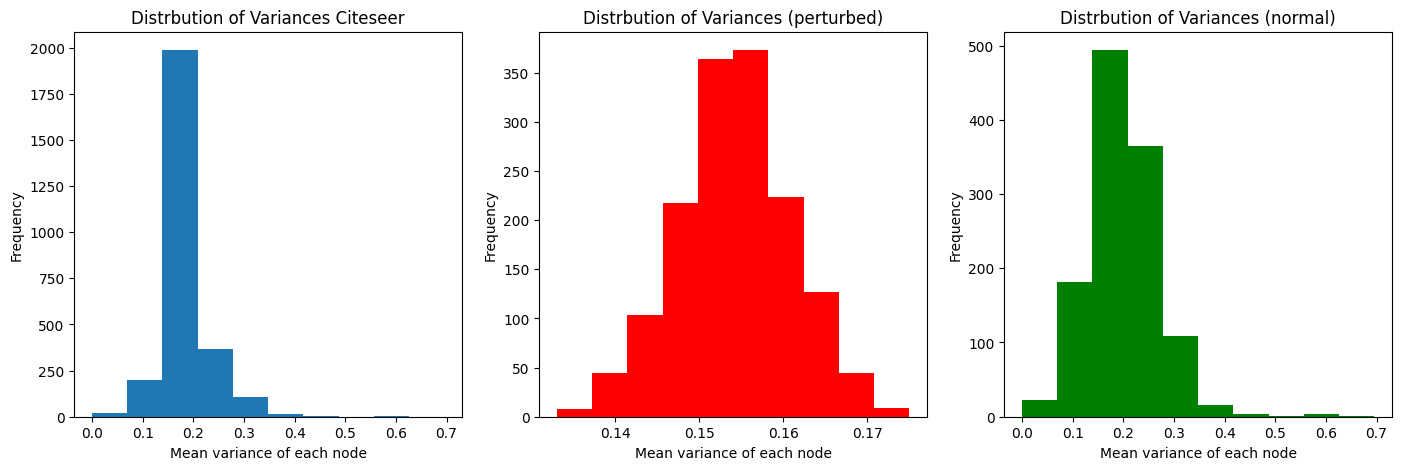

In [12]:
plt.figure(figsize = (17,5))
plt.subplot(1,3,1)
plt.title("Distrbution of Variances Citeseer")
plt.xlabel('Mean variance of each node')
plt.ylabel('Frequency')
plt.hist(var0['mean'])
plt.subplot(1,3,2)
plt.title("Distrbution of Variances (perturbed)")
plt.xlabel('Mean variance of each node')
plt.ylabel('Frequency')
plt.hist(var0[var0['Perturbed']==True]['mean'], color='red')
plt.subplot(1,3,3)
plt.title("Distrbution of Variances (normal)")
plt.xlabel('Mean variance of each node')
plt.ylabel('Frequency')
plt.hist(var0[var0['Perturbed']==False]['mean'], color='green')

In [110]:
mean_pert = var0[var0['Perturbed']==True]['mean']
print(np.mean(mean_pert))
print(np.std(mean_pert))

0.26210498772548735
0.019551671220573955


In [153]:

mean_mean = np.mean(var0['mean'] )
mean_std = np.std(var0['mean'] )
thrs = [mean_mean-2*mean_std, mean_mean-mean_std, mean_mean, mean_mean+mean_std, mean_mean+2*mean_std]
thrs

[0.05810578878848198,
 0.09377231927088472,
 0.12943884975328748,
 0.16510538023569024,
 0.20077191071809297]

In [ ]:
def get_pert_rm_idx(thr, variance_matrix):
    # variance_matrix has mean column
    # thr is the actual number like 0.22300164528433944
    rm_pert_idx = []
    for i in range(variance_matrix.shape[0]):
        if variance_matrix['mean'][i] < thr:
            rm_pert_idx.append(i)
    return rm_pert_idx

In [ ]:
def remove_pert(features, rm_pert_idx):
    features = features.toarray()
    cleaned_features = []
    for i in range(len(features)):
        if not i in rm_pert_idx:
            cleaned_features.append(features[i])
    cleaned_features = sp.csr_matrix(cleaned_features)
    return cleaned_features

In [116]:
var0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,Perturbed
0,0.253713,0.244096,0.247609,0.238925,0.239587,0.241277,0.322446,0.254168,0.237571,0.273687,0.247284,0.245183,0.223116,0.231244,0.210221,0.243147,0.247080,True
1,0.277580,0.274407,0.273173,0.279133,0.263584,0.275545,0.337473,0.276450,0.264163,0.292324,0.288955,0.276295,0.272464,0.270108,0.225032,0.275967,0.276416,True
2,0.243605,0.221571,0.222795,0.200512,0.205319,0.222812,0.244008,0.243366,0.225120,0.230532,0.279219,0.223416,0.202899,0.168380,0.168697,0.221164,0.220213,False
3,0.244607,0.241735,0.202295,0.196417,0.199747,0.213056,0.323290,0.253401,0.199443,0.210060,0.214699,0.211180,0.290770,0.143840,0.248615,0.210846,0.225250,False
4,0.280422,0.278719,0.262141,0.291120,0.262307,0.272835,0.344662,0.279189,0.266255,0.284173,0.289879,0.282184,0.246484,0.262124,0.232393,0.282789,0.276105,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19712,0.333971,0.314745,0.283236,0.293260,0.298229,0.324254,0.341550,0.296631,0.338814,0.321069,0.320469,0.318625,0.300245,0.272908,0.250242,0.260950,0.304325,False
19713,0.242756,0.244990,0.236474,0.239589,0.237811,0.233526,0.302870,0.254295,0.229951,0.253681,0.257585,0.251972,0.227023,0.194014,0.217279,0.227771,0.240724,True
19714,0.170005,0.219061,0.182340,0.241927,0.189291,0.165700,0.210370,0.204063,0.181135,0.188722,0.209176,0.162741,0.110231,0.271471,0.198932,0.196112,0.193830,False
19715,0.290360,0.286926,0.282364,0.286452,0.276019,0.300081,0.343469,0.290508,0.288755,0.295590,0.305722,0.282202,0.261106,0.247315,0.221607,0.295828,0.284644,True


(array([   8.,   67.,  667., 2278., 3784., 3228., 1433.,  383.,   65.,
           7.]),
 array([0.        , 0.05610719, 0.11221439, 0.16832158, 0.22442877,
        0.28053597, 0.33664316, 0.39275036, 0.44885755, 0.50496474,
        0.56107194]),
 <BarContainer object of 10 artists>)

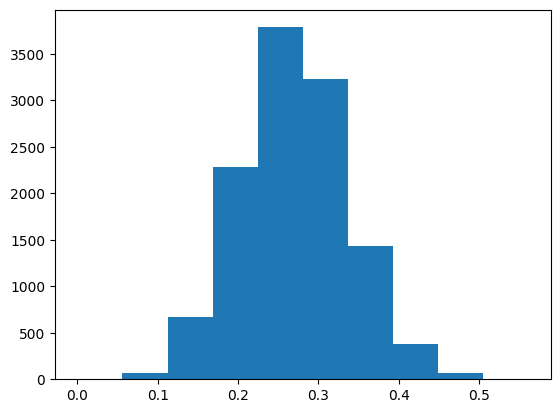

In [106]:
plt.hist(var0[var0['Perturbed']==False]['mean'])

(array([3.211e+03, 7.400e+01, 2.500e+01, 7.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.0019816 , 0.0039632 , 0.0059448 , 0.0079264 ,
        0.009908  , 0.0118896 , 0.01387119, 0.01585279, 0.01783439,
        0.01981599]),
 <BarContainer object of 10 artists>)

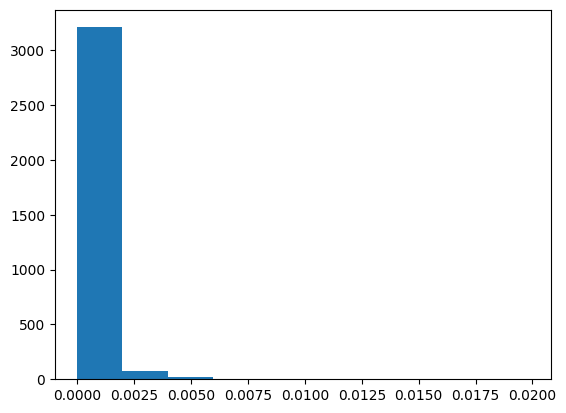

In [94]:
# layer 1
var1 = pd.read_csv('var1.csv')
var1['mean'] = var1.mean(axis=1)
plt.hist(var1['mean'])


In [95]:
perturbed_idx = np.load('/home/zihe-leon/Desktop/RobustGCN-master/perturbed_idx.npy')
perturbed = [False]*var1.shape[0]
for i in range(len(perturbed)):
    if i in perturbed_idx:
        perturbed[i] = True
var1['Perturbed'] = perturbed

(array([1.261e+03, 2.000e+01, 1.400e+01, 1.900e+01, 5.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.00093595, 0.00187189, 0.00280784, 0.00374378,
        0.00467973, 0.00561567, 0.00655162, 0.00748756, 0.00842351,
        0.00935945]),
 <BarContainer object of 10 artists>)

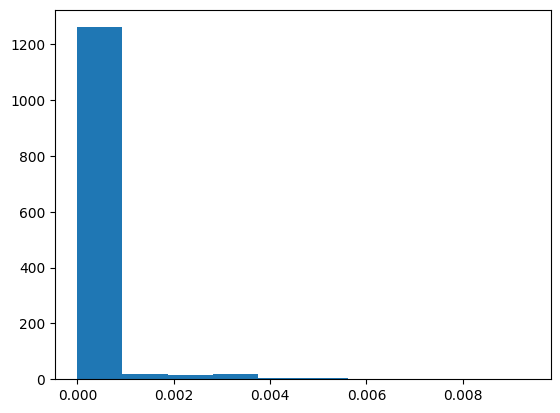

In [96]:
plt.hist(var1[var1['Perturbed']==True]['mean'])

(array([1.926e+03, 4.500e+01, 1.600e+01, 4.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.0019816 , 0.0039632 , 0.0059448 , 0.0079264 ,
        0.009908  , 0.0118896 , 0.01387119, 0.01585279, 0.01783439,
        0.01981599]),
 <BarContainer object of 10 artists>)

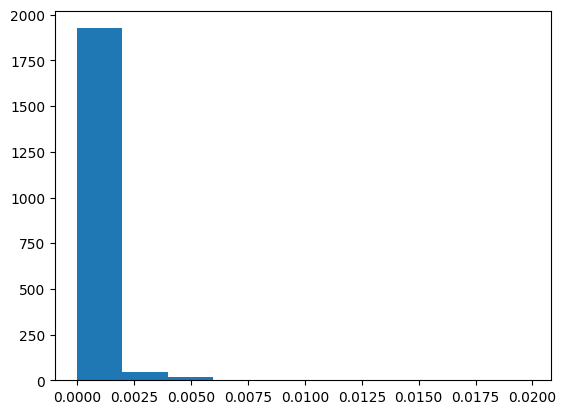

In [97]:
plt.hist(var1[var1['Perturbed']==False]['mean'])

In [119]:
from utils import *
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, label = load_data('cora')

/home/zihe-leon/Desktop/RobustGCN-master/src/utils.py:52: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))


In [140]:
y_train.shape

(2708, 7)

In [123]:
len(train_mask)

2708

In [124]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.])

In [128]:
adj.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [130]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

In [137]:
np.delete(a, [0, 1], 1)  


array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

In [134]:
np.random.normal(0, .1, 1)[0]

-0.08667404022651018

In [168]:
import time
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from utils import *
from models import RGCN
import random
import scipy.sparse as sp
# Set random seed
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)
random.seed(seed)

# Load data
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, label = load_data('pubmed')

In [169]:
features = features.toarray()

In [171]:
features.shape

(19717, 500)

In [160]:
rm_pert_idx = [1,2,3,4,5]

In [161]:
good_features = np.delete(features, rm_pert_idx, 0)  

In [173]:
mean_feature = np.mean(good_features, axis = 0)

In [174]:
features[rm_pert_idx, :] = mean_feature

In [177]:
mean_feature

array([0.01747921, 0.003149  , 0.00665818, 0.00445175, 0.00277314,
       0.0049105 , 0.00344368, 0.00615893, 0.00626731, 0.00551068,
       0.00572493, 0.00394314, 0.00362948, 0.00735494, 0.00410522,
       0.01336814, 0.0098626 , 0.00469489, 0.0059289 , 0.00246475,
       0.00413206, 0.00483047, 0.00588466, 0.00402587, 0.00262026,
       0.00682373, 0.00383301, 0.00335858, 0.00358783, 0.00864138,
       0.00309658, 0.0045795 , 0.00976456, 0.0070263 , 0.00222787,
       0.00375665, 0.00536659, 0.005214  , 0.00846629, 0.00258064,
       0.00305643, 0.00668726, 0.00419219, 0.0050413 , 0.00362298,
       0.00254187, 0.00394036, 0.0046618 , 0.00475851, 0.01062819,
       0.00247971, 0.00313338, 0.00533196, 0.00914905, 0.00631789,
       0.00551139, 0.00444924, 0.00487736, 0.0029067 , 0.00438403,
       0.00659282, 0.00474455, 0.00597586, 0.00344425, 0.0033396 ,
       0.00418668, 0.00278114, 0.00948224, 0.00428892, 0.00406558,
       0.01012116, 0.00720145, 0.00614854, 0.00370534, 0.00549

In [176]:
features[1:5]

array([[0.01747921, 0.003149  , 0.00665818, 0.00445175, 0.00277314,
        0.0049105 , 0.00344368, 0.00615893, 0.00626731, 0.00551068,
        0.00572493, 0.00394314, 0.00362948, 0.00735494, 0.00410522,
        0.01336814, 0.0098626 , 0.00469489, 0.0059289 , 0.00246475,
        0.00413206, 0.00483047, 0.00588466, 0.00402587, 0.00262026,
        0.00682373, 0.00383301, 0.00335858, 0.00358783, 0.00864138,
        0.00309658, 0.0045795 , 0.00976456, 0.0070263 , 0.00222787,
        0.00375665, 0.00536659, 0.005214  , 0.00846629, 0.00258064,
        0.00305643, 0.00668726, 0.00419219, 0.0050413 , 0.00362298,
        0.00254187, 0.00394036, 0.0046618 , 0.00475851, 0.01062819,
        0.00247971, 0.00313338, 0.00533196, 0.00914905, 0.00631789,
        0.00551139, 0.00444924, 0.00487736, 0.0029067 , 0.00438403,
        0.00659282, 0.00474455, 0.00597586, 0.00344425, 0.0033396 ,
        0.00418668, 0.00278114, 0.00948224, 0.00428892, 0.00406558,
        0.01012116, 0.00720145, 0.00614854, 0.00

In [84]:
l = [0.787, 0.785, 0.771]
np.std(l)

0.007118052168020881

In [85]:
np.mean(l)

0.781